# Improving module of cuYS

* For the master thesis reserch I used object created from the L1,L2 network represntation. But let's adapt the module to work with igrapgh.Graph object imput.

In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from module.Models import YardSale as ys
from module.Models import MergerSpinoff as ms

In [3]:
g=ig.Graph.Barabasi(1000,1)

#Create a model
S=ys(g,0.5)

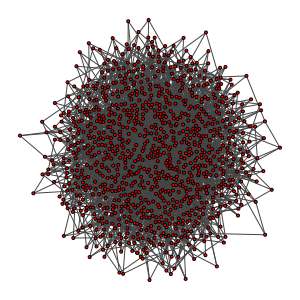

In [4]:
g=ig.Graph.Barabasi(1000,3)

ig.plot(g,vertex_size=3,bbox=(0,0,300,300))

In [5]:
Sy=ys([ig.Graph.Barabasi(1000,3),ig.Graph.Barabasi(1000,1),ig.Graph.Barabasi(1000,10)],0.2)

In [6]:
S=ms([g]*30)

Text(0.5, 1.0, 'Wealth distribution')

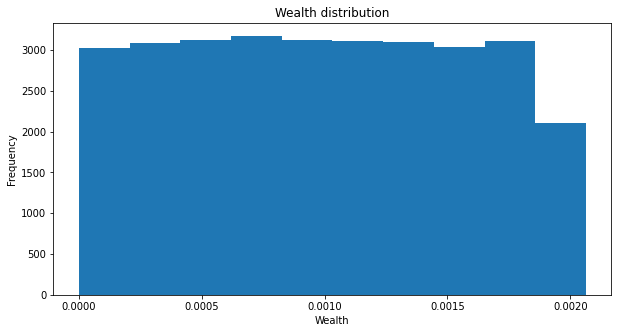

In [7]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.hist(S.getWealths())
ax.set_xlabel('Wealth')
ax.set_ylabel('Frequency')
ax.set_title('Wealth distribution')


In [8]:
S.getWealths().size

30000

In [9]:
S.termalize(1000)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


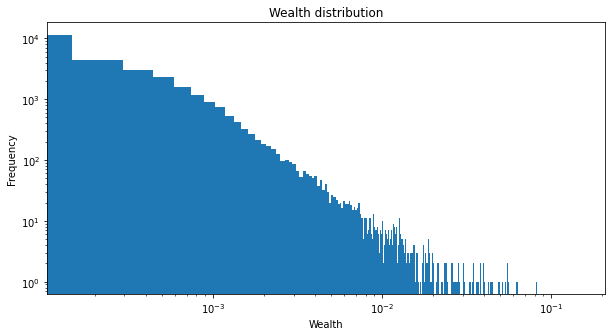

In [10]:

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.hist(S.getWealths(),bins=1000)
ax.set_xlabel('Wealth')
ax.set_ylabel('Frequency')
ax.set_title('Wealth distribution')
#loglog scale
ax.set_yscale('log')
ax.set_xscale('log')

In [11]:
S.getGini()

array([0.8295056 , 0.86249864, 0.74026   , 0.7939515 , 0.7834177 ,
       0.8013828 , 0.7682619 , 0.82466394, 0.8026618 , 0.80275023,
       0.77885914, 0.7586995 , 0.79222494, 0.80419105, 0.77624106,
       0.7314089 , 0.82343113, 0.74949837, 0.777184  , 0.7439144 ,
       0.8375263 , 0.79936963, 0.7839161 , 0.7507781 , 0.77506006,
       0.8047234 , 0.81415427, 0.7630003 , 0.8135682 , 0.8267379 ],
      dtype=float32)

Text(0, 0.5, 'Wealth')

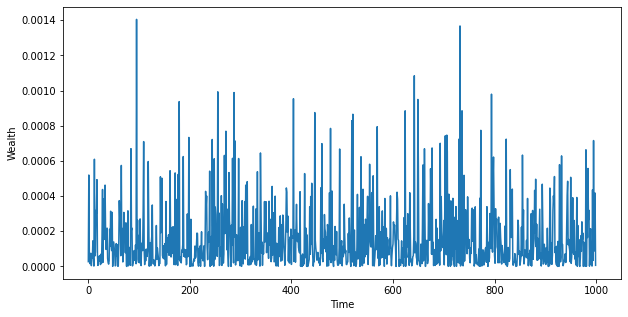

In [12]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(S.follow(1000,1))
ax.set_xlabel('Time')
ax.set_ylabel('Wealth')

In [13]:
S.getGini()

array([0.8603579 , 0.8931171 , 0.7501655 , 0.79012954, 0.79654634,
       0.82788944, 0.77962476, 0.84544677, 0.82890147, 0.82518446,
       0.78959644, 0.76149315, 0.8196677 , 0.8153383 , 0.793114  ,
       0.73681074, 0.8572971 , 0.74539614, 0.77965784, 0.7500119 ,
       0.8492442 , 0.80687124, 0.7911197 , 0.7521291 , 0.79864645,
       0.81692666, 0.83449423, 0.76312953, 0.83579004, 0.82846   ],
      dtype=float32)

In [14]:
(getG(S.getWealths()[:1000],1000),getG(S.getWealths()[1000:2000],1000),getG(S.getWealths()[2000:],1000))

NameError: name 'getG' is not defined

In [ ]:
def getG(x,n):
    "Retorna gini de un arreglo x de longitud n"
    sorted_x = np.sort(x)
    cumx = np.cumsum(sorted_x, dtype=np.float32)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    

In [ ]:
import networkx as nx 
#create erdos renyi graph
G=nx.erdos_renyi_graph(1000,0.1)

In [ ]:
S=ys([G,G,G],0.2)

In [ ]:
S.getWealths().sum()

3.0000005

In [ ]:
S.reset(wealth_type='equal')